In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

In [3]:
data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5), (0.5))
])

In [4]:
# install for train and test
root = './'
train = MNIST(root, train=True,  transform=data_tfs, download=True)
test  = MNIST(root, train=False, transform=data_tfs, download=True)

In [5]:
print(f'Data size:\n\t train {len(train)},\n\t test {len(test)}')
print(f'Data shape:\n\t features {train[0][0].shape},\n\t target {type(test[0][1])}')

Data size:
	 train 60000,
	 test 10000
Data shape:
	 features torch.Size([1, 28, 28]),
	 target <class 'int'>


In [6]:
from torch.utils.data import DataLoader

batch_size = 256

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [7]:
features = 784
classes = 10

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [84]:
class Net(torch.nn.Module):
    def __init__(self, features, n_hidden_neurons):
        super(Net, self).__init__()
        
        self.fc1 = torch.nn.Linear(features, 128)
        self.activ1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(128, 128)
        self.activ2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(128, 128)
        self.activ3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(128, 128)
        self.activ4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(128, classes)
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        x = self.activ4(x)
        x = self.fc5(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        return x
    
net = Net(features, 128)

In [85]:
criterion = nn.CrossEntropyLoss()      # (logsoftmax + negative likelihood) в своей основе применительно к логитам (logits)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [86]:
losses_train = []
losses_test = []
for epoch in range(13):
    history_train = []
    history_test = []
    for x_batch, y_batch in train_loader:
    # 1. # загружаем батч данных (вытянутый в линию)
        x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
        y_batch = y_batch.to(device)

    # 2. вычисляем скор с помощью прямого распространения ( .forward or .__call__ )
        preds = net(x_batch)

    # 3. вычислеяем - функцию потерь (loss)
        loss = criterion(preds, y_batch)
        #history.append(loss.item())

    # 4. вычисляем градиенты
        optimizer.zero_grad()
        loss.backward()

    # 5. шаг градиентного спуска
        optimizer.step()
        history_train.append(loss.item())
    losses_train.append(np.mean(history_train))
    
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
            y_batch = y_batch.to(device)
            
            preds = net(x_batch)
            
            loss = criterion(preds, y_batch)
            
            history_test.append(loss.item())
    
    losses_test.append(np.mean(history_test))       
    print(f'{epoch+1},\t loss: {history_train[-1]}')
    print(f'{epoch+1},\t loss: {history_test[-1]}')


1,	 loss: 0.3102811872959137
1,	 loss: 0.6452949643135071
2,	 loss: 0.26129835844039917
2,	 loss: 0.5227288603782654
3,	 loss: 0.2249191850423813
3,	 loss: 0.39725685119628906
4,	 loss: 0.1963321715593338
4,	 loss: 0.3231958746910095
5,	 loss: 0.1887316256761551
5,	 loss: 0.3145866394042969
6,	 loss: 0.16399532556533813
6,	 loss: 0.2986645996570587
7,	 loss: 0.14811287820339203
7,	 loss: 0.2562374770641327
8,	 loss: 0.14254161715507507
8,	 loss: 0.24867717921733856
9,	 loss: 0.128465935587883
9,	 loss: 0.23153501749038696
10,	 loss: 0.1276879906654358
10,	 loss: 0.2418094128370285
11,	 loss: 0.12598510086536407
11,	 loss: 0.2451215535402298
12,	 loss: 0.11102715879678726
12,	 loss: 0.21413642168045044
13,	 loss: 0.08564123511314392
13,	 loss: 0.27756139636039734


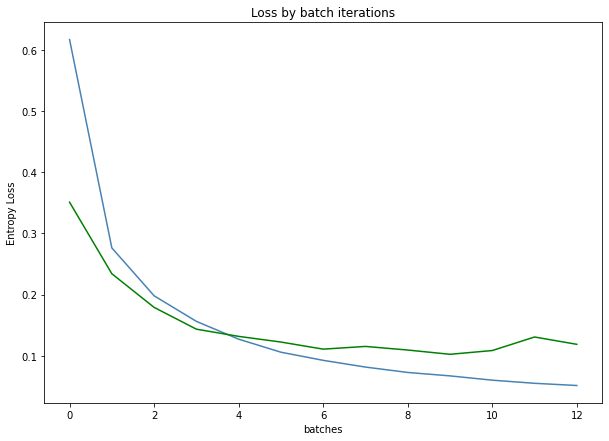

In [87]:
import matplotlib.pyplot as plt
     
plt.figure(figsize=(10, 7))

plt.plot(losses_train, color='steelblue')
plt.plot(losses_test, color='green')

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()